In [20]:
%load_ext autoreload
%autoreload 2

from src.models.gps import GPS
from src.models.gcn import GCN
from src.models.explainer.explainer_pipeline import ExplainerPipeline
from src.data import loader
from src.models.explainer.attention_explainer import AttentionExplainer
from src.models.model import test
from src.models.utils.hooks import GPSHook

from torch_geometric.explain.explainer import ModelConfig, ThresholdConfig
from torch import tensor

import networkx as nx

import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# AttentionExplainer benchmark
- GPS

## BAShapes
- 75 nodes
- ~300 edges
- 10 house motifs

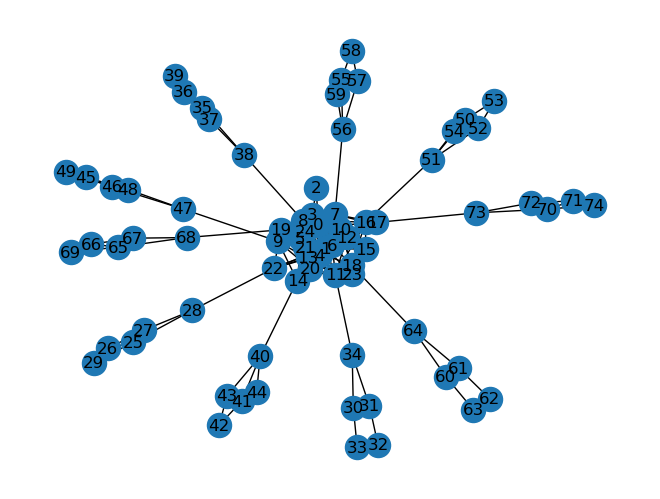

In [21]:
ba_shapes, ba_shapes_num_classes, ba_shapes_data_networkx = loader.load_clean_bashapes(num_nodes=25, num_edges=5, num_motifs=10, laplacian_eigenvector_dimensions=2)
nx.draw(ba_shapes_data_networkx, with_labels=True)

In [31]:
ba_shapes_explainer_params = {
    'explanation_type': 'model',
    'node_mask_type': 'attributes',
    'edge_mask_type': 'object',
    'model_config': ModelConfig(
        mode='multiclass_classification',
        task_level='node',
        return_type='raw',
    ),
}

ba_shapes_explainer_pipelines = {
    "gps": ExplainerPipeline(
        ba_shapes,
        ba_shapes_num_classes,
        GPS,
        AttentionExplainer,
        model_params={
            'pe_channels': 2,
            'num_layers': 4,
            'hidden_channels': 4,
            'num_attention_heads': 1,
            'observe_attention': True
        },
        explainer_params=ba_shapes_explainer_params,
        epochs=400,
        Hook=GPSHook
    )
}

100%|██████████| 400/400 [00:03<00:00, 116.01it/s]


Evaluate model performance.

In [32]:
gps_train_acc, gps_test_acc = test(ba_shapes_explainer_pipelines["gps"].model, ba_shapes)

print(f"GPS train accuracy: {gps_train_acc}")
print(f"GPS test accuracy: {gps_test_acc}")

GPS train accuracy: 1.0
GPS test accuracy: 0.8666666666666667


Generate and evaluate explanation for node 28, which is in a house motif. Do the same for node 0, which is in the Barabasi-Albert graph.

In [ ]:
a = tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
          6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
         11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
         13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
         16, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,
         19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23,
         23, 24, 24, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 28, 28, 29, 29,
         22, 28, 30, 30, 30, 31, 31, 31, 32, 32, 33, 33, 34, 34, 11, 34, 35, 35,
         35, 36, 36, 36, 37, 37, 38, 38, 39, 39,  8, 38, 40, 40, 40, 41, 41, 41,
         42, 42, 43, 43, 44, 44, 14, 40, 45, 45, 45, 46, 46, 46, 47, 47, 48, 48,
         49, 49,  9, 47, 50, 50, 50, 51, 51, 51, 52, 52, 53, 53, 54, 54, 16, 51,
         55, 55, 55, 56, 56, 56, 57, 57, 58, 58, 59, 59,  7, 56, 60, 60, 60, 61,
         61, 61, 62, 62, 63, 63, 64, 64, 18, 64, 65, 65, 65, 66, 66, 66, 67, 67,
         68, 68, 69, 69, 19, 68, 70, 70, 70, 71, 71, 71, 72, 72, 73, 73, 74, 74,
         17, 73],
        [ 2,  3,  5,  6,  9, 10, 12, 13,  5,  6,  7,  8, 10, 11, 15, 22, 23, 24,
          0,  3,  0,  2,  5,  7, 12, 19, 21, 24,  7, 11, 12, 13, 20, 22,  0,  1,
          3,  6,  8,  9, 19, 20, 21, 24,  0,  1,  5,  7,  8, 11, 14, 15, 16, 17,
         18, 22,  1,  3,  4,  6,  8,  9, 10, 12, 16, 17, 18,  1,  5,  6,  7, 10,
         13, 14, 16, 19,  0,  5,  7, 11, 14, 19, 20, 21,  0,  1,  7,  8, 18,  1,
          4,  6,  9, 12, 16, 20, 23,  0,  3,  4,  7, 11, 15, 17,  0,  4,  8, 14,
         22, 23, 24,  6,  8,  9, 13, 18,  1,  6, 12, 16, 23,  6,  7,  8, 11, 15,
         18,  6,  7, 12, 19,  6,  7, 10, 14, 16, 20, 21,  3,  5,  8,  9, 17, 22,
         24,  4,  5,  9, 11, 18,  3,  5,  9, 18,  1,  4,  6, 13, 19,  1, 11, 13,
         15,  1,  3,  5, 13, 19, 26, 28, 29, 29, 27, 25, 26, 28, 27, 25, 25, 26,
         28, 22, 31, 33, 34, 34, 32, 30, 31, 33, 32, 30, 30, 31, 34, 11, 36, 38,
         39, 39, 37, 35, 36, 38, 37, 35, 35, 36, 38,  8, 41, 43, 44, 44, 42, 40,
         41, 43, 42, 40, 40, 41, 40, 14, 46, 48, 49, 49, 47, 45, 46, 48, 47, 45,
         45, 46, 47,  9, 51, 53, 54, 54, 52, 50, 51, 53, 52, 50, 50, 51, 51, 16,
         56, 58, 59, 59, 57, 55, 56, 58, 57, 55, 55, 56, 56,  7, 61, 63, 64, 64,
         62, 60, 61, 63, 62, 60, 60, 61, 64, 18, 66, 68, 69, 69, 67, 65, 66, 68,
         67, 65, 65, 66, 68, 19, 71, 73, 74, 74, 72, 70, 71, 73, 72, 70, 70, 71,
         73, 17]])

b = tensor([[26, 27, 28, 22,  6, 17, 73, 70, 27, 28, 22,  6, 17, 73, 70, 71],
        [27, 28, 22,  6, 17, 73, 70, 71, 26, 27, 28, 22,  6, 17, 73, 70]])

import torch
edge_mask = torch.zeros(a.shape[1])

print(a.unsqueeze(2).shape)
print(b.unsqueeze(1).shape)
mask = 
mask.shape

torch.Size([2, 308, 1])
torch.Size([2, 1, 16])


torch.Size([308])

In [73]:
nodes = [26, 0]
for model in ba_shapes_explainer_pipelines:
    for node in nodes:
        ba_shapes_explainer_pipelines[model].explain(node, laplacian_eigenvector_pe=ba_shapes.laplacian_eigenvector_pe, attention_computation_method="shortest_path")

Visualize GPS explanations.

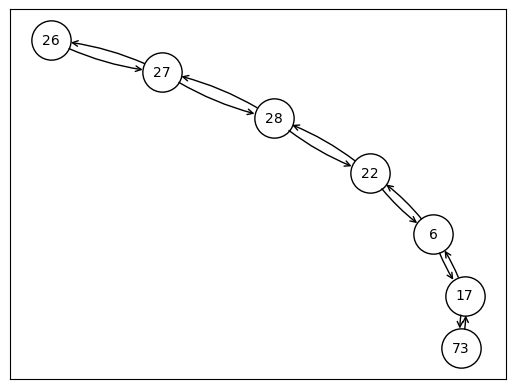

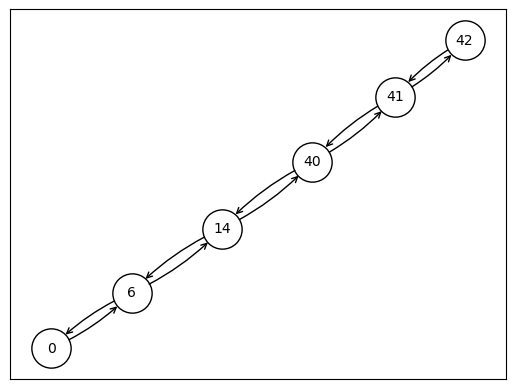

In [76]:
ba_shapes_explainer_pipelines["gps"].explanations[26].visualize_graph()
ba_shapes_explainer_pipelines["gps"].explanations[0].visualize_graph()

Evaluate explanations.

In [30]:
metrics = []
for model in ba_shapes_explainer_pipelines:
    for node in nodes:
        metrics.append((ba_shapes_explainer_pipelines[model].get_explanation_characterization_score(node), ba_shapes_explainer_pipelines[model].get_explanation_accuracy(node), model, node, ba_shapes_explainer_pipelines[model].get_explanation_fidelity(node)))

for metric in metrics:
    print(f"Model: {metric[2]}")
    print(f"Node: {metric[3]}")
    print(f"Explanation accuracy: {metric[1]}")
    print(f"Explanation pos fidelity: {metric[4][0]}")
    print(f"Explanation neg fidelity: {metric[4][1]}")
    print(f"Characterization score: {metric[0]}")
    print("\n")

Model: gps
Node: 26
Explanation accuracy: 0.9740259647369385
Explanation pos fidelity: 0.0
Explanation neg fidelity: 0.0
Characterization score: N/A


Model: gps
Node: 0
Explanation accuracy: 0.9155844449996948
Explanation pos fidelity: 0.0
Explanation neg fidelity: 0.0
Characterization score: N/A




## PascalVOC-SP
- 499 nodes
- 2826 edges

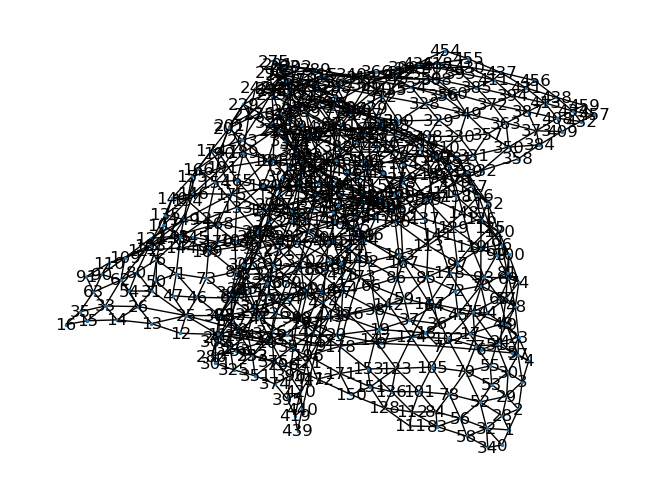

In [123]:
pascalvoc_sp, pascalvoc_sp_num_classes, pascal_voc_sp_data_networkx = loader.load_clean_pascalvoc_sp(3)
nx.draw(pascal_voc_sp_data_networkx, with_labels=True, node_size=2)

In [124]:
pascalvoc_sp_explainer_params = {
    'explanation_type': 'model',
    'node_mask_type': 'attributes',
    'edge_mask_type': 'object',
    'model_config': ModelConfig(
        mode='binary_classification',
        task_level='node',
        return_type='raw',
    )
}

pascalvoc_sp_explainer_pipelines = {
    "gps": ExplainerPipeline(
        pascalvoc_sp,
        pascalvoc_sp_num_classes,
        GPS,
        GNNExplainer,
        model_params={
            'pe_channels': 5,
            'num_layers': 2,
            'hidden_channels': 4,
            'num_attention_heads': 1,
            'observe_attention': True
        },
        explainer_params={
            **pascalvoc_sp_explainer_params,
            "threshold_config": ThresholdConfig(threshold_type='topk', value=10)
        },
        epochs=500
    ),
    "gcn": ExplainerPipeline(
        pascalvoc_sp,
        pascalvoc_sp_num_classes,
        GCN,
        GNNExplainer,
        model_params={
            "hidden_channels":20,
            "num_layers": 20
        },
        explainer_params={
            **pascalvoc_sp_explainer_params,
            "threshold_config": ThresholdConfig(threshold_type='topk', value=10)
        },
        epochs=500
    )
}

100%|██████████| 500/500 [00:12<00:00, 39.40it/s]


Evaluate model performance.

In [130]:
gps_train_acc, gps_test_acc = test(pascalvoc_sp_explainer_pipelines["gps"].model, pascalvoc_sp)
gcn_train_acc, gps_test_acc = test(pascalvoc_sp_explainer_pipelines["gcn"].model, pascalvoc_sp)

print(f"GPS train accuracy: {gps_train_acc}")
print(f"GCN train accuracy: {gcn_train_acc}")

print(f"GPS test accuracy: {gps_test_acc}")
print(f"GCN test accuracy: {gps_test_acc}")

GPS train accuracy: 1.0
GCN train accuracy: 0.46115288220551376
GPS test accuracy: 0.46
GCN test accuracy: 0.46


Generate and evaluate explanation for two arbitrary nodes.

In [133]:
nodes = random.sample(range(0, pascalvoc_sp.num_nodes), 2)
for model in pascalvoc_sp_explainer_pipelines:
    for node in nodes:
        pascalvoc_sp_explainer_pipelines[model].explain(node, random_walk_pe=pascalvoc_sp.random_walk_pe)

100%|██████████| 100/100 [00:04<00:00, 23.22it/s]


Visualize GCN explanations.

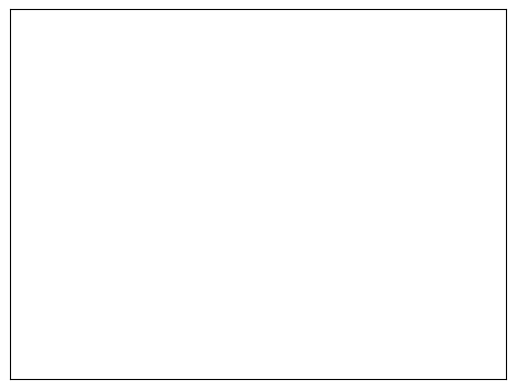

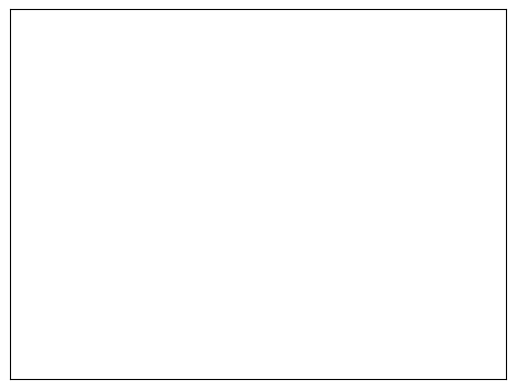

In [135]:
for node in nodes:
    pascalvoc_sp_explainer_pipelines["gcn"].explanations[node].visualize_graph()

Visualize GPS explanations.

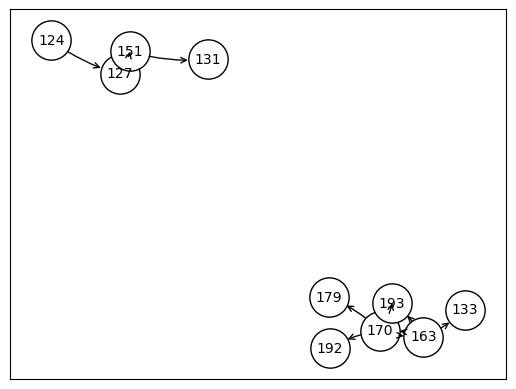

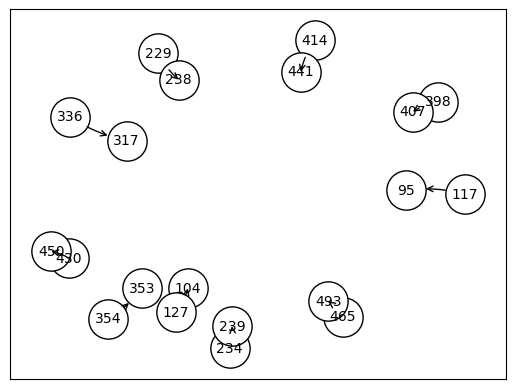

In [136]:
for node in nodes:
    pascalvoc_sp_explainer_pipelines["gps"].explanations[node].visualize_graph()

In [137]:
metrics = []
for model in pascalvoc_sp_explainer_pipelines:
    for node in nodes:
        metrics.append((pascalvoc_sp_explainer_pipelines[model].get_explanation_characterization_score(node), model, node, pascalvoc_sp_explainer_pipelines[model].get_explanation_fidelity(node)))

for metric in metrics:
    print(f"Model: {metric[1]}")
    print(f"Node: {metric[2]}")
    print(f"Explanation pos fidelity: {metric[3][0]}")
    print(f"Explanation neg fidelity: {metric[3][1]}")
    print(f"Characterization score: {metric[0]}")
    print("\n")

Model: gps
Node: 135
Explanation pos fidelity: 0.0
Explanation neg fidelity: 1.0
Characterization score: N/A


Model: gps
Node: 451
Explanation pos fidelity: 0.0
Explanation neg fidelity: 0.0
Characterization score: N/A


Model: gcn
Node: 135
Explanation pos fidelity: 0.0
Explanation neg fidelity: 0.0
Characterization score: N/A


Model: gcn
Node: 451
Explanation pos fidelity: 0.0
Explanation neg fidelity: 0.0
Characterization score: N/A


